In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [29]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code here that might generate warnings


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [5]:
plant_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plant_dataset",
    batch_size= BATCH_SIZE,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True,
)

Found 20638 files belonging to 15 classes.


In [6]:
class_names = plant_dataset.class_names
plant_dataset.class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
len(plant_dataset)

645

In [8]:
for image_batch, label_batch  in plant_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 7  6  5 11 14  5  6  3  7  1 13  5  8 14 14  1  9  7  9  1 12 11 12  0
 11  9  5  0 12  3 12  5]


In [9]:
for image_batch, label_batch in plant_dataset.take(1):
    print(image_batch)

tf.Tensor(
[[[[149. 142. 150.]
   [186. 179. 187.]
   [162. 155. 163.]
   ...
   [147. 137. 145.]
   [147. 137. 145.]
   [145. 135. 143.]]

  [[145. 138. 146.]
   [172. 165. 173.]
   [163. 156. 164.]
   ...
   [149. 139. 147.]
   [149. 139. 147.]
   [144. 134. 142.]]

  [[151. 144. 152.]
   [152. 145. 153.]
   [149. 142. 150.]
   ...
   [151. 141. 149.]
   [148. 138. 146.]
   [142. 132. 140.]]

  ...

  [[168. 159. 162.]
   [168. 159. 162.]
   [168. 159. 162.]
   ...
   [154. 143. 147.]
   [163. 152. 156.]
   [146. 135. 139.]]

  [[168. 159. 162.]
   [168. 159. 162.]
   [168. 159. 162.]
   ...
   [177. 166. 170.]
   [177. 166. 170.]
   [164. 153. 157.]]

  [[168. 159. 162.]
   [168. 159. 162.]
   [168. 159. 162.]
   ...
   [147. 136. 140.]
   [147. 136. 140.]
   [164. 153. 157.]]]


 [[[ 46.  44.  49.]
   [ 57.  55.  60.]
   [ 64.  62.  67.]
   ...
   [ 57.  55.  60.]
   [ 54.  52.  57.]
   [ 55.  53.  58.]]

  [[ 82.  80.  85.]
   [ 77.  75.  80.]
   [ 71.  69.  74.]
   ...
   [ 64.  

# convert the tensor image to numpy

In [10]:
for image_batch, label_batch in plant_dataset.take(1):
    print(image_batch.numpy())

[[[[ 87.  81.  83.]
   [114. 108. 110.]
   [102.  96.  98.]
   ...
   [131. 125. 127.]
   [113. 107. 109.]
   [107. 101. 103.]]

  [[119. 113. 115.]
   [103.  97.  99.]
   [113. 107. 109.]
   ...
   [108. 102. 104.]
   [108. 102. 104.]
   [127. 121. 123.]]

  [[102.  96.  98.]
   [ 85.  79.  81.]
   [103.  97.  99.]
   ...
   [134. 128. 130.]
   [119. 113. 115.]
   [129. 123. 125.]]

  ...

  [[182. 180. 185.]
   [182. 180. 185.]
   [181. 179. 184.]
   ...
   [179. 184. 190.]
   [178. 183. 189.]
   [178. 183. 189.]]

  [[182. 180. 185.]
   [181. 179. 184.]
   [181. 179. 184.]
   ...
   [180. 185. 191.]
   [180. 185. 191.]
   [180. 185. 191.]]

  [[181. 179. 184.]
   [181. 179. 184.]
   [181. 179. 184.]
   ...
   [180. 185. 191.]
   [181. 186. 192.]
   [182. 187. 193.]]]


 [[[122. 126. 125.]
   [125. 129. 128.]
   [128. 132. 131.]
   ...
   [131. 135. 136.]
   [132. 136. 137.]
   [132. 136. 137.]]

  [[126. 130. 129.]
   [129. 133. 132.]
   [131. 135. 134.]
   ...
   [131. 135. 136.]
 

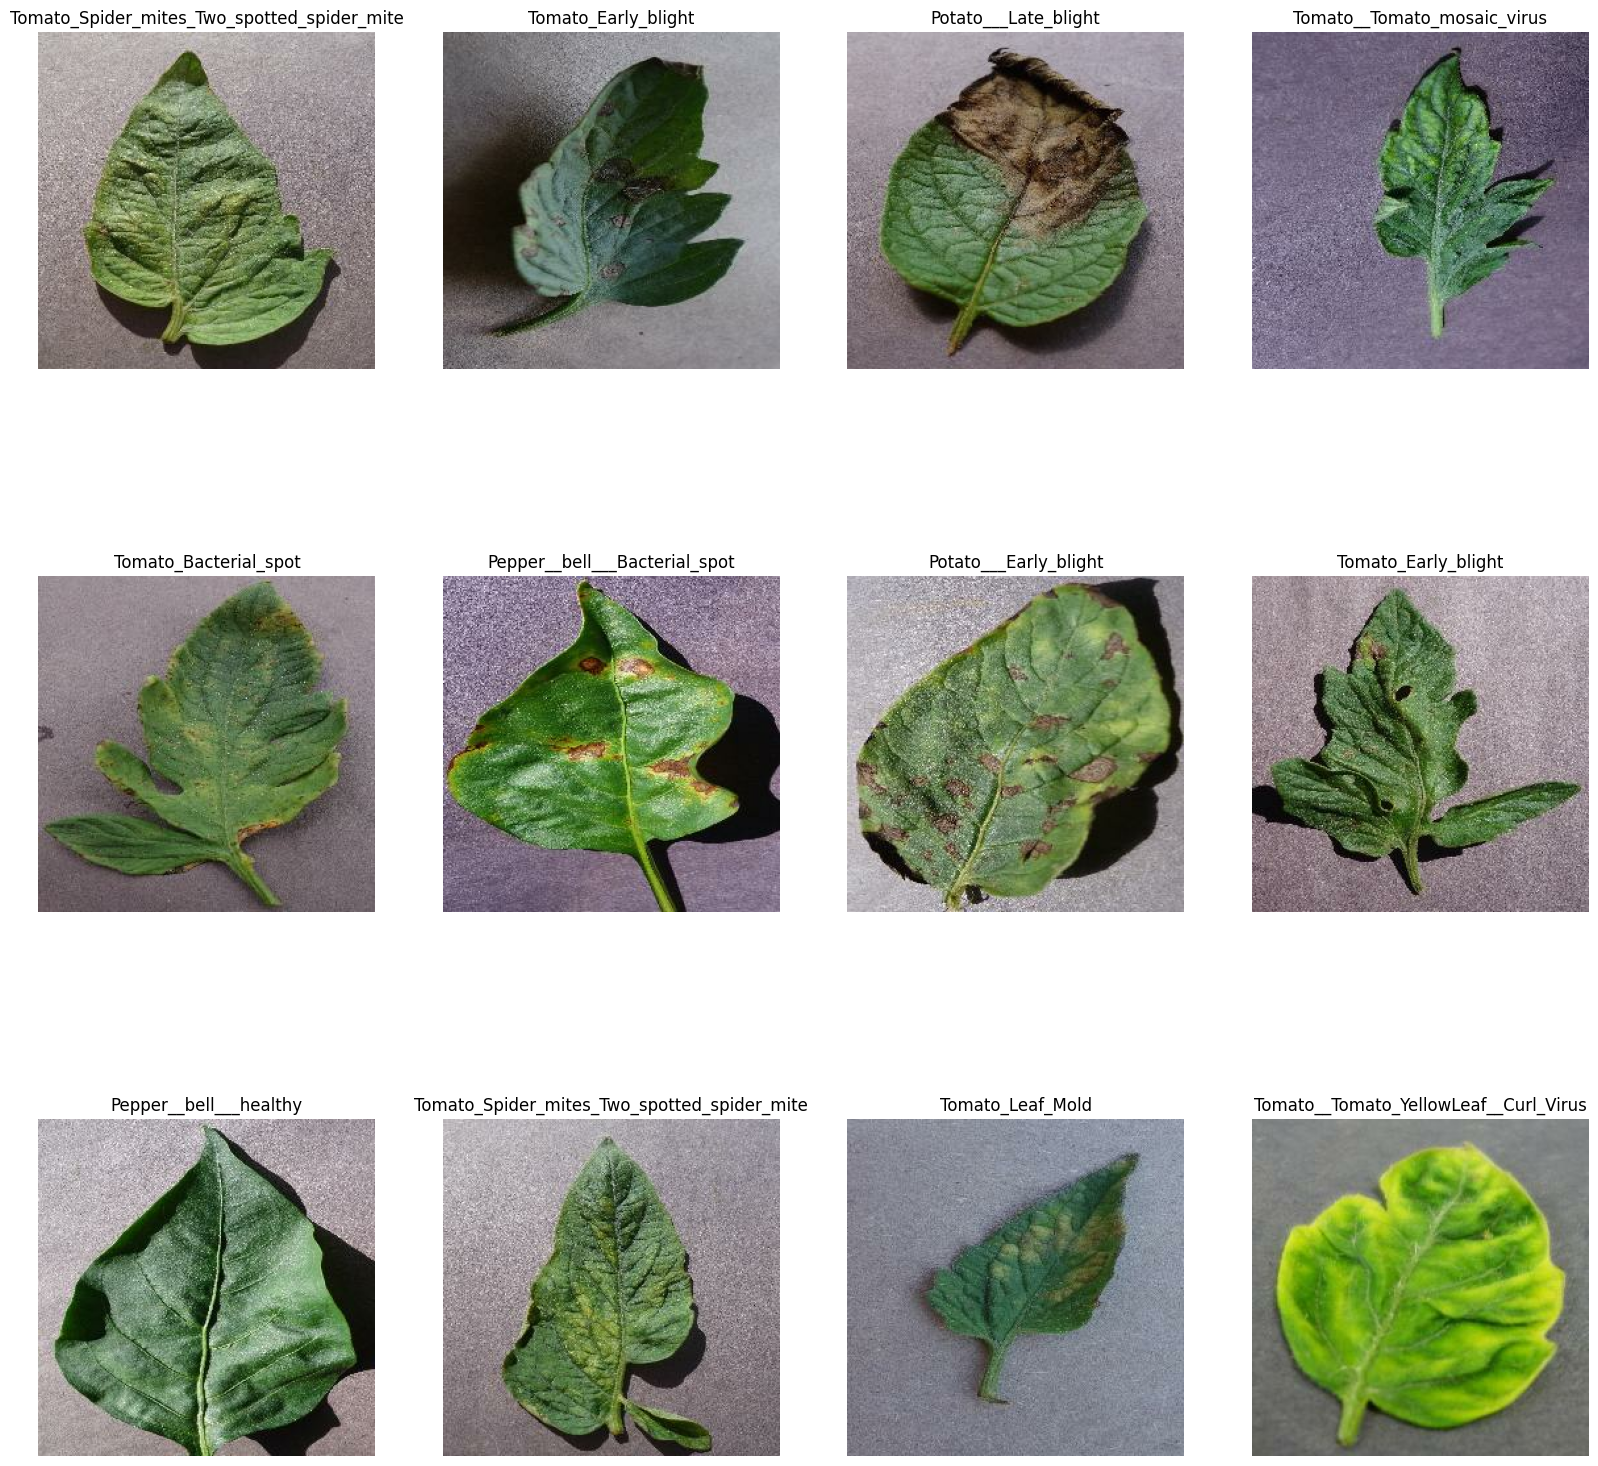

In [11]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in plant_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    #print(image_batch)

In [12]:
len(plant_dataset) # no of batch of the dataset

645

# 80% traing set , 10% testing set, 10% validation

In [13]:
# gettting total number for the traing dataset
train_size = 0.8
len(plant_dataset)*train_size

516.0

In [14]:
# storing the datset in train_ds variable
train_ds = plant_dataset.take(516)
len(train_ds)

516

In [15]:
# removing datset that are save for the traning 
test_ds = plant_dataset.skip(516)
len(test_ds)

129

In [16]:
# getting total number of datset for the validation by First_method
val_size = 0.1
len(plant_dataset)*val_size

64.5

In [17]:
# getting total number of datset for the validation by second_method
val_size_2 = 0.5
len(test_ds)*val_size_2

64.5

In [18]:
# storing datset for validation
val_ds = test_ds.take(64)
len(val_ds)

64

In [19]:
# removing validation dataset from plant_dataset which were used in val_ds variable 
test_ds = test_ds.skip(64)
len(test_ds)

65

In [20]:
def get_datset_partition_tf(ds, train_split = 0.8, test_size=0.1, val_split = 0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split* ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(val_size).skip(train_size)
    
    return train_ds, val_ds, test_ds
    

In [21]:
train_ds, val_ds, test_ds = get_datset_partition_tf(plant_dataset)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

516
64
65


In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# normalizeing the image between 0 to 1

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# data agmatation

In [24]:
data_augemantation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# convolution model (CNN)

In [25]:
input_shape = (32,32,32, 3)
n_class = 15
model = models.Sequential([
    resize_and_rescale,
    data_augemantation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_class, activation="softmax")   #normalize the class probabiliy of calsses
    
])

model.build(input_shape = input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [27]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
)

model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

In [28]:
history = model.fit(
    train_ds, 
    epochs = 30,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
    
)

Epoch 1/30
516/516 [==============================] - 263s 404ms/step - loss: 2.0732 - accuracy: 0.3145 - val_loss: 1.8744 - val_accuracy: 0.4248
Epoch 2/30
516/516 [==============================] - 179s 346ms/step - loss: 1.2108 - accuracy: 0.5970 - val_loss: 1.2438 - val_accuracy: 0.5796
Epoch 3/30
516/516 [==============================] - 124s 240ms/step - loss: 0.7720 - accuracy: 0.7333 - val_loss: 1.4909 - val_accuracy: 0.5737
Epoch 4/30
516/516 [==============================] - 118s 228ms/step - loss: 0.5733 - accuracy: 0.8027 - val_loss: 0.8777 - val_accuracy: 0.7109
Epoch 5/30
516/516 [==============================] - 173s 335ms/step - loss: 0.4765 - accuracy: 0.8371 - val_loss: 0.6466 - val_accuracy: 0.7773
Epoch 6/30
516/516 [==============================] - 133s 258ms/step - loss: 0.3990 - accuracy: 0.8624 - val_loss: 0.8062 - val_accuracy: 0.7363
Epoch 7/30
516/516 [==============================] - 133s 258ms/step - loss: 0.3479 - accuracy: 0.8840 - val_loss: 0.6118 -

In [30]:
scores = model.evaluate(test_ds)

65/65 [==============================] - 85s 97ms/step - loss: 0.3574 - accuracy: 0.8894


In [31]:
scores

[0.3573521673679352, 0.8894230723381042]

In [32]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 516}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
history.history['accuracy']

[0.31449854373931885,
 0.5969597697257996,
 0.7332848906517029,
 0.802749514579773,
 0.8370881676673889,
 0.8624030947685242,
 0.8839631676673889,
 0.8865067958831787,
 0.9050993323326111,
 0.911579430103302,
 0.9119428396224976,
 0.9260537624359131,
 0.9261748790740967,
 0.9258115291595459,
 0.9328367114067078,
 0.9367732405662537,
 0.9436167478561401,
 0.943071722984314,
 0.947795569896698,
 0.9439195990562439,
 0.952822208404541,
 0.948703944683075,
 0.9510053396224976,
 0.9541545510292053,
 0.9564558863639832,
 0.9554263353347778,
 0.9614219665527344,
 0.957848846912384,
 0.9589389562606812,
 0.963178277015686]

In [40]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Traning and validation Loss')

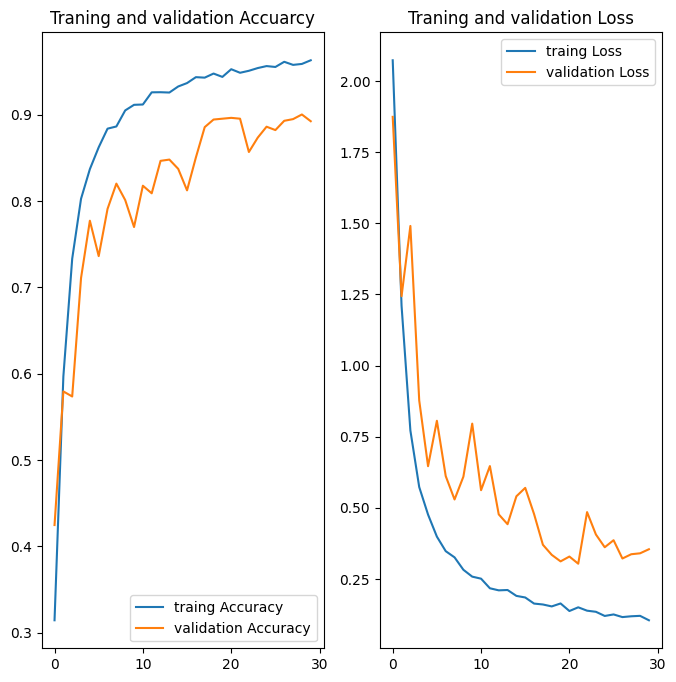

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(30),acc, label = "traing Accuracy")
plt.plot(range(30),val_acc, label = "validation Accuracy")
plt.legend(loc= "lower right")
plt.title("Traning and validation Accuarcy")

plt.subplot(1,2,2)
plt.plot(range(30),loss, label = "traing Loss")
plt.plot(range(30),val_loss, label = "validation Loss")
plt.legend(loc= "upper right")
plt.title("Traning and validation Loss")

first image to predict
actual label: Tomato_Late_blight
1/1 [==============================] - 0s 48ms/step
predicted label: Tomato_Late_blight
[6.7837412e-08 3.1208276e-09 1.2056115e-06 9.4857556e-04 1.7587154e-12
 1.4463950e-09 5.8169728e-03 9.9322838e-01 3.6132403e-10 4.8116412e-06
 2.4604676e-12 7.0794229e-08 6.5264365e-12 1.9737558e-12 6.2185365e-12]


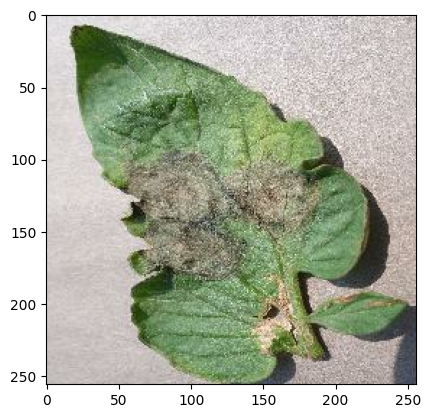

In [55]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    print(batch_prediction[0])

In [51]:
from keras.models import save_model

# Save the model
model.save("plant_village.h5")

In [52]:
model.save_weights('plant_village_weights.h5')

# write a fuction for inferance

In [56]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [57]:
# now run inferance on few sample images

1/1 [==============================] - 0s 16ms/step


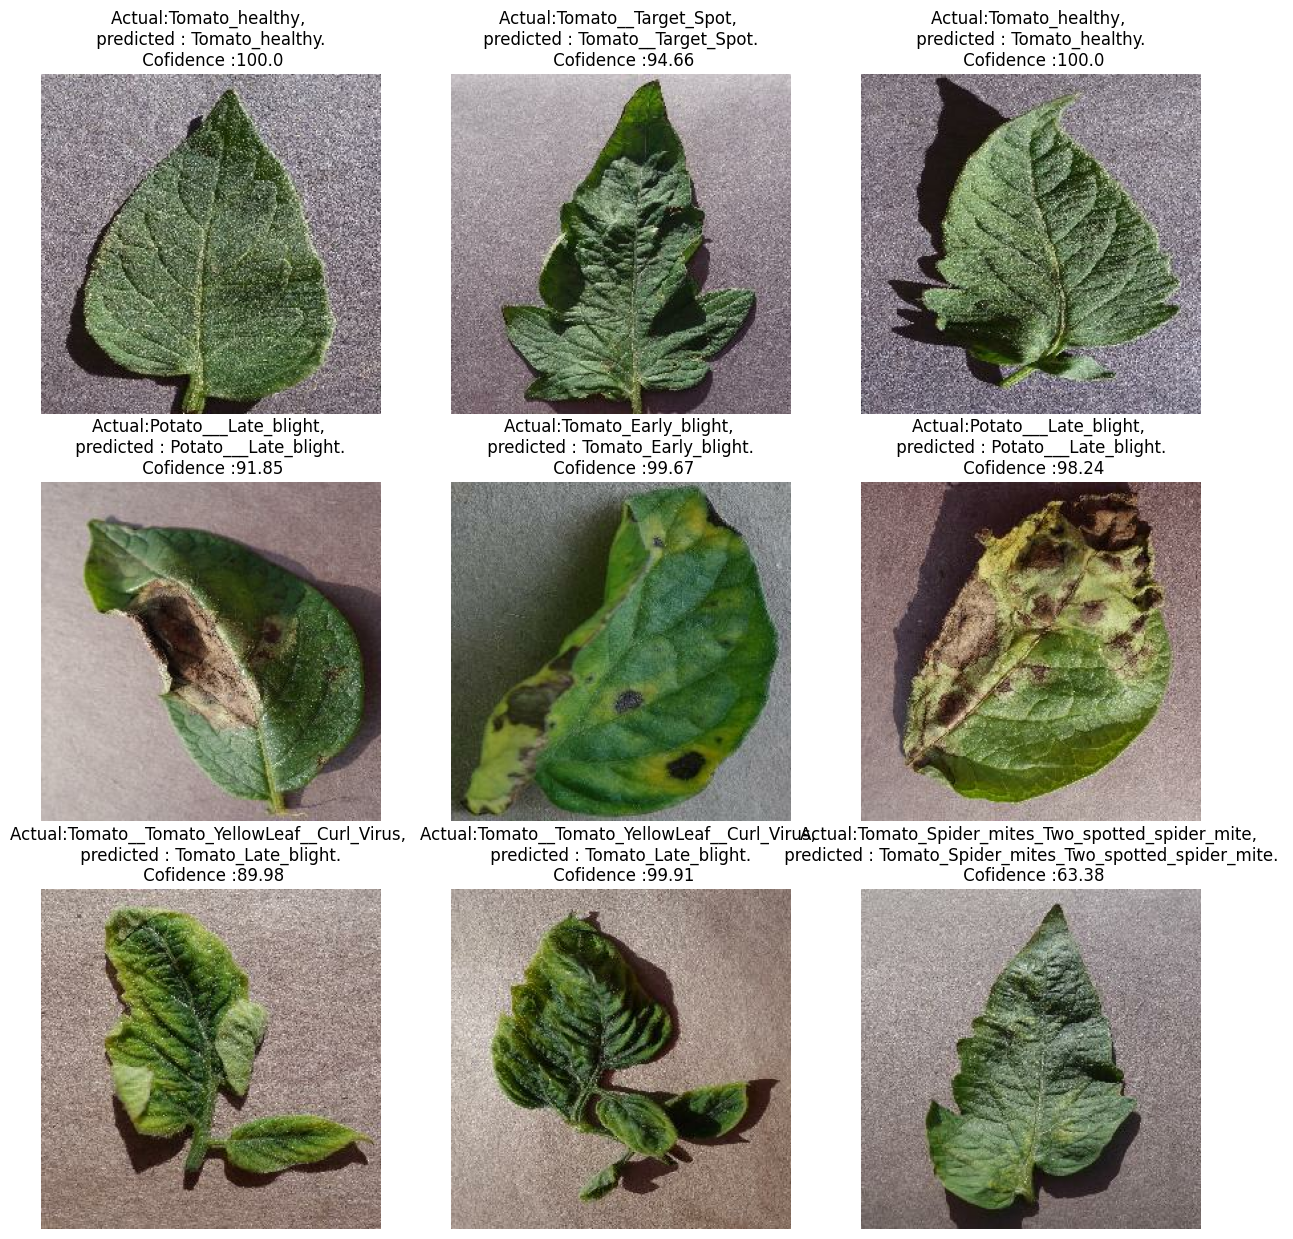

In [61]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidance = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class}, \n predicted : {predicted_class}. \n Cofidence :{confidance}")
        
        plt.axis("off")